In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns



file_path= r"C:\Users\bhati\Desktop\Churn Analysis\Book1.xlsx"

sheet_name = 'vw_ChurnData'

data=pd.read_excel(file_path,sheet_name=sheet_name)

print(data.head())



  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                31     Deal 1           Yes             No  ...   
1                 9     Deal 5           Yes             No  ...   
2                28     Deal 1           Yes            Yes  ...   
3                12        NaN           Yes             No  ...   
4                27     Deal 2           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Wi

In [8]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1)


columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])



data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})




X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)




rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[777  64]
 [123 238]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       841
           1       0.79      0.66      0.72       361

    accuracy                           0.84      1202
   macro avg       0.83      0.79      0.81      1202
weighted avg       0.84      0.84      0.84      1202



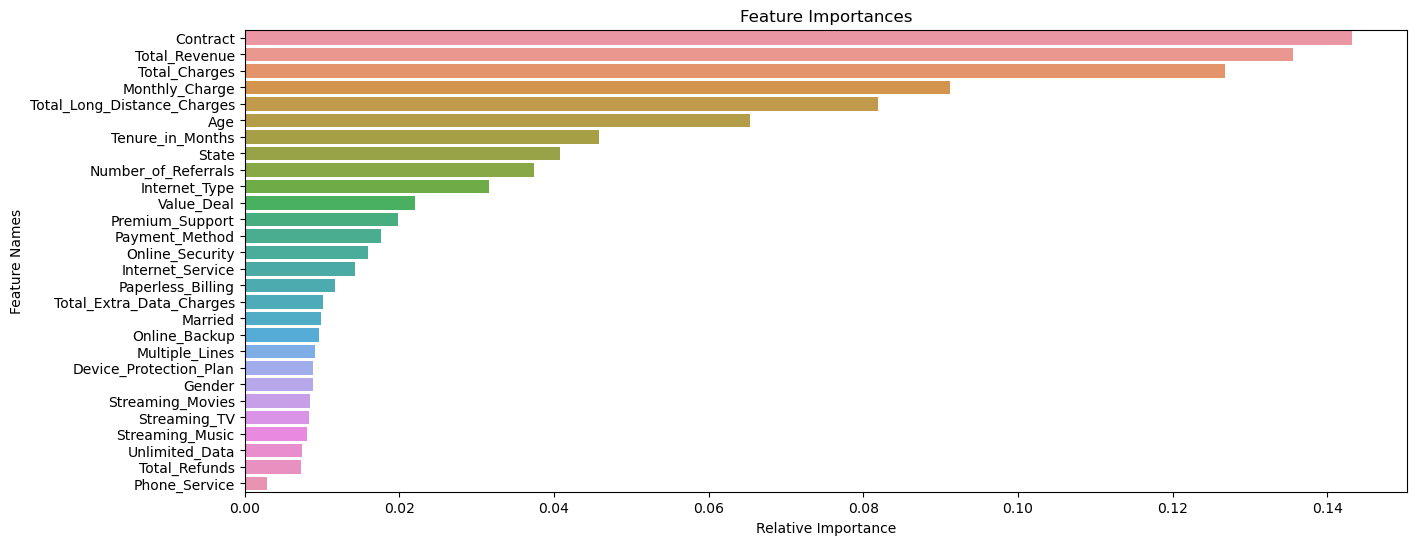

In [10]:

y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]


plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()


In [17]:

file_path= r"C:\Users\bhati\Desktop\Churn Analysis\Book1.xlsx"


sheet_name = 'vw_JoinData'


new_data = pd.read_excel(file_path, sheet_name=sheet_name)


print(new_data.head())


original_data = new_data.copy()


customer_ids = new_data['Customer_ID']


new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)


for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])


new_predictions = rf_model.predict(new_data)


original_data['Customer_Status_Predicted'] = new_predictions


original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


original_data.to_csv(r"C:\Users\bhati\Desktop\Churn Analysis\Book1.csv")


  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4